# Find the squares in a list of points

This was a sample Google interview question to which I challenged myself to find
the solution.  It was an interesting problem.

The interviewer initially allowed the candidate to simplify the problem to just
squares perpendicular to the x axis.  I'm not sure this limitation really makes
this problem that much easier.

Importing numpy, sympy and itertoools as well as matplotlib (for charting the
resulting points to gut check) and setting up some styles.

In [2]:
import numpy as np
import sympy as sp
import itertools as it
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid"])

## The Search Space

For this, I'm including a search space with some points along which contains
two squares perpendicular to the x-axis as well as one which is 45 degrees from
the x-axis;  The solution should find any squares in the search space though.

In [146]:
space = np.array(
    [ [1, 1], [0, 0], [2, 0], [-1, 1], [4, 6], [5, 1], [3, 2], [1, 7], [1, 2], [2,2], [2,1], [0,2]])

## The approach

To approach this problem, we *could* do all combinations of 4 points in the set to see if they
the resulting segments are perpendicular to each other; however, it may be more efficient to
just take combinations of two points and look to see if the perpendicular points are also in
the search space - if so, we know we have a square.

## Some setup

I'm going to define two rotation matricies - one to rotate 90 degrees counter clockwise and the
other to rotate 90 degrees clockwise.

In [147]:
rot_cc = np.array([[0, -1], 
                   [1, 0]])
sp.Matrix(rot_cc)

Matrix([
[0, -1],
[1,  0]])

The counterclockwise matrix works because the X-unit vector (1, 0) would should be rotated
to (0, 1) and the Y-unit vector should be rotated to (-1, 0).

The clockwise rotation matrix should be the transposition of this:

In [148]:
rot_cw = rot_cc.T
sp.Matrix(rot_cw)

Matrix([
[ 0, 1],
[-1, 0]])

## Finding the Squares Function

In this case, we are going to create a generator function which takes
the search space and will iteratively return the points of any square
it finds in the search space.

We create a list to hold any squares we report to prevent it from 
being re-reported when the one of the other segments are checked.

*NOTE: we need to check the others as well since they could be a 
shared segment between two squares.*

We use the itertools library combinations function to get all 
choose 2 combinations from the search space (no repeats).

Then we iterate over each combination.

First we compute the other participating points in the square
(t1 and t2) by subtracting p2 from p2, computing the dot
product with the clockwise rotation and then adding p2 back
to the resulting point.  We do the same with p2 - p1 to get the
other participating point.

From there, we just check if the new points are in the list or not.

The `found_set` variable gives us a way to sort the points as a 
set by the x then y axis - since other segments in the square would
result in the same set.   We then add this to our reported array
so this square isn't reported multiple times.

In [149]:
def find_squares(ss):

    # Keep track of squares we have reported.
    reported = []
    
    # Unique combinations of pairs of points.
    sp = it.combinations(ss, r=2)
    
    for idx, (p1, p2) in enumerate(sp):
        t1 = (rot_cw @ (p1-p2)) + p2
        t2 = (rot_cc @ (p2-p1)) + p1
        if (t1.tolist() in ss.tolist()) and (t2.tolist() in ss.tolist()):
            points = np.array([p1, p2, t1, t2])
            found_set = set(sorted(set([tuple(p) for p in points])))
            if (found_set in reported):
                continue
            reported.append(found_set)
            yield points

Now that we have our generator function, we can call it on our
search space displaying the found points in the square and plotting
them using matplotlib to verify they do in fact show a square.  We
are leaving the final segment off for simplicity; to add it, 
we would just append the original point to the end of the x and
y series.

Matrix([
[1, 1],
[2, 1],
[2, 2],
[1, 2]])

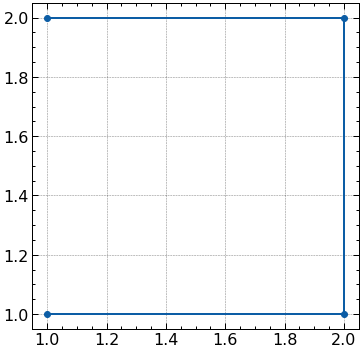

Matrix([
[ 1, 1],
[ 0, 2],
[-1, 1],
[ 0, 0]])

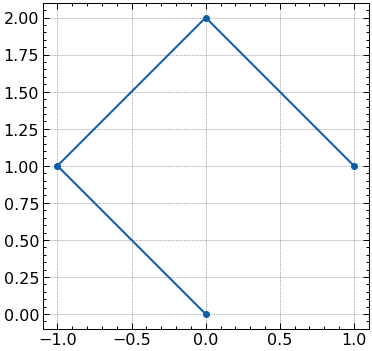

Matrix([
[0, 0],
[2, 0],
[2, 2],
[0, 2]])

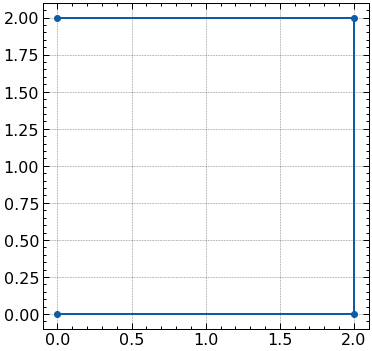

In [152]:
for square in find_squares(space):
    display(sp.Matrix(square))
    x = square[:, 0]
    y = square[:, 1]
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(x, y, "o-")
    plt.show()